<a href="https://colab.research.google.com/github/SiddTayi/Internship/blob/main/Car_class_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('Car Evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


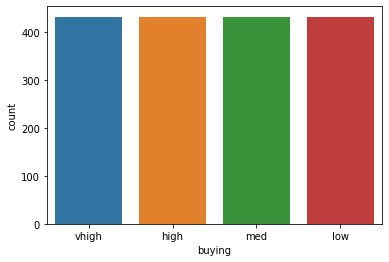

In [7]:
sb.countplot(df['buying'])

In [9]:
for col in df.columns:
  print(col+":")
  print(df[col].unique())

buying:
['vhigh' 'high' 'med' 'low']
maint:
['vhigh' 'high' 'med' 'low']
doors:
['2' '3' '4' '5more']
persons:
['2' '4' 'more']
lug_boot:
['small' 'med' 'big']
safety:
['med' 'high' 'low']
Class:
['unacc' 'acc' 'vgood' 'good']


In [10]:
df['doors']=df['doors'].replace({'5more':'5'})
df['persons']=df['persons'].replace({'more':'5'})

In [12]:
df['doors'].unique()

array(['2', '3', '4', '5'], dtype=object)

In [16]:
# Label encoding

full_tab = df.apply(LabelEncoder().fit_transform)
full_tab.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [25]:
x = full_tab[full_tab.columns[:-1]]
y = full_tab[full_tab.columns[-1]]
x

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


# Random Forest


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [33]:
for data in [y_train,y_test]:
  print(data.describe())

count    1381.000000
mean        1.551050
std         0.880403
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Class, dtype: float64
count    346.000000
mean       1.560694
std        0.860107
min        0.000000
25%        1.250000
50%        2.000000
75%        2.000000
max        3.000000
Name: Class, dtype: float64


In [34]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
pred = classifier.predict(x_test)
pred
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      1.00      1.00        12
           2       1.00      0.98      0.99       249
           3       1.00      0.90      0.95        10

    accuracy                           0.98       346
   macro avg       0.98      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346



Using this ML technique, the accuracy and F1 score turned out to be pretty good.

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 75,   0,   0,   0],
       [  0,  12,   0,   0],
       [  6,   0, 243,   0],
       [  1,   0,   0,   9]])

In [43]:
full_tab.tail()

,buying,maint,doors,persons,lug_boot,safety,Class
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1
1726,1,1,3,2,0,0,3


## Predicting using custom input

In [44]:
classifier.predict([[1, 1, 3, 2, 1, 0]])

array([3])

The model correctly predicts the class of the car using custom inputs.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


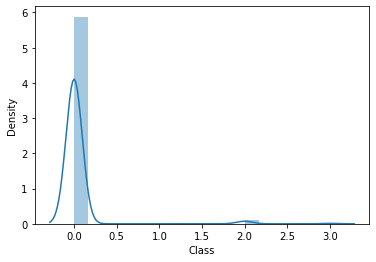

In [37]:
sb.distplot(y_test-pred)